In [1]:
# Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Scoring
from sklearn.metrics import mean_squared_error


In [2]:
features = ['quality', 'year', 'remod_year', 'mas_vnr_area', 'total_basement_sqft', 'gr_living_sqft', 'baths', 'rooms_total', 'fireplaces', 'garage_sqft', 'garage_year',]
predictor = 'price'

class ModelData():
    def __init__(self):
        ## Import Raw Datasets
        self.data = pd.read_csv('./datasets/train.csv')
        self.testing_data = pd.read_csv('./datasets/test.csv')
        
        ## Clean data
        column_dict = {
                        'Id': 'id',
                        'PID': 'pid',
                        'MS SubClass': 'ms_subclass',
                        'MS Zoning': 'ms_zoning',
                        'Lot Frontage': 'frontage',
                        'Lot Area': 'lot_sqft',
                        'Street': 'street_material',
                        'Alley': 'alley',
                        'Lot Shape': 'shape',
                        'Land Contour': 'contour',
                        'Utilities': 'utilities',
                        'Lot Config': 'config',
                        'Land Slope': 'slope',
                        'Neighborhood': 'neighborhood',
                        'Condition 1': 'cond_1',
                        'Condition 2': 'cond_2',
                        'Bldg Type': 'type',
                        'House Style': 'style',
                        'Overall Qual': 'quality',
                        'Overall Cond': 'condition',
                        'Year Built': 'year',
                        'Year Remod/Add': 'remod_year',
                        'Roof Style': 'roof',
                        'Roof Matl': 'roof_mat',
                        'Exterior 1st': 'ext_1',
                        'Exterior 2nd': 'ext_2',
                        'Mas Vnr Type': 'mas_vnr_type',
                        'Mas Vnr Area': 'mas_vnr_area',
                        'Exter Qual': 'exter_qual',
                        'Exter Cond': 'exter_cond',
                        'Foundation': 'foundation',
                        'Bsmt Qual': 'basement_qual',
                        'Bsmt Cond': 'basement_cond',
                        'Bsmt Exposure': 'basement_exposure',
                        'BsmtFin Type 1': 'basement_fin_1',
                        'BsmtFin SF 1': 'basement_fin_sqft_1',
                        'BsmtFin Type 2': 'basement_fin_2',
                        'BsmtFin SF 2': 'basement_fin_sqft_2',
                        'Bsmt Unf SF': 'basement_unfin_sqft',
                        'Total Bsmt SF': 'total_basement_sqft',
                        'Heating': 'heating',
                        'Heating QC': 'heating_qc',
                        'Central Air': 'ac',
                        'Electrical': 'electrical',
                        '1st Flr SF': 'sqft_1',
                        '2nd Flr SF': 'sqft_2',
                        'Low Qual Fin SF': 'low_qual_sqft',
                        'Gr Liv Area': 'gr_living_sqft',
                        'Bsmt Full Bath': 'basement_bath',
                        'Bsmt Half Bath': 'basement_half_bath',
                        'Full Bath': 'full_bath',
                        'Half Bath': 'half_bath',
                        'Bedroom AbvGr': 'bed',
                        'Kitchen AbvGr': 'kitchen',
                        'Kitchen Qual': 'kitchen_qual',
                        'TotRms AbvGrd': 'rooms_total',
                        'Functional': 'functional',
                        'Fireplaces': 'fireplaces',
                        'Fireplace Qu': 'fireplace_qual',
                        'Garage Type': 'garage_type',
                        'Garage Yr Blt': 'garage_year',
                        'Garage Finish': 'garage_finish',
                        'Garage Cars': 'garage_size',
                        'Garage Area': 'garage_sqft',
                        'Garage Qual': 'garage_qual',
                        'Garage Cond': 'garage_cond',
                        'Paved Drive': 'paved_drive',
                        'Wood Deck SF': 'deck_wood_sqft',
                        'Open Porch SF': 'porch_sqft',
                        'Enclosed Porch': 'porch_enc_sqft',
                        '3Ssn Porch': 'porch_3_ssn',
                        'Screen Porch': 'porch_screened',
                        'Pool Area': 'pool_sqft',
                        'Pool QC': 'pool_qc',
                        'Fence': 'fence',
                        'Misc Feature': 'misc',
                        'Misc Val': 'misc_sqft',
                        'Mo Sold': 'sold_month',
                        'Yr Sold': 'sold_year',
                        'Sale Type': 'sale_type',
                        'SalePrice': 'price'
                    }
        self.data.rename(columns=column_dict, inplace=True)
        self.testing_data.rename(columns=column_dict, inplace=True)
        
        ##############################################################
        # Data cleaning

        # Fill NaNs
        # Impute missing data by property type
        for c in ['frontage']:
        # sets index to type, makes a dict of median values of target var based on group by category, then applies that grouped median to null values of target var and saves in place
            self.data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]
            self.testing_data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]

        # Fill Missing Data
        # Categorical
        for c in ['mas_vnr_type', 'alley']:
            self.data[c].fillna('None', inplace=True)
            self.testing_data[c].fillna('None', inplace=True)

        # Numeric
        for c in ['mas_vnr_area', 'basement_fin_sqft_1', 'basement_fin_sqft_2', 'basement_unfin_sqft', 'total_basement_sqft', 'basement_bath', 'basement_half_bath',
                  'garage_size', 'garage_sqft']:
            self.data[c].fillna(0, inplace=True)
            self.testing_data[c].fillna(0, inplace=True)


        # garage_year
        self.data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.testing_data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.data.at[1699,'garage_year'] = 2006 # incorrect data, changing to year property was built
        # misc
        self.data.drop(columns=['misc'], inplace=True)
        self.testing_data.drop(columns=['misc'], inplace=True)
        # utilities
        self.data.drop(columns=['utilities'], inplace=True)
        self.testing_data.drop(columns=['utilities'], inplace=True)
        # roof_mat
        self.data.drop(columns=['roof_mat'], inplace=True)
        self.testing_data.drop(columns=['roof_mat'], inplace=True)
        # ext 1 & 2
        self.data.drop(columns=['ext_1', 'ext_2'], inplace=True)
        self.testing_data.drop(columns=['ext_1', 'ext_2'], inplace=True)

        # Ordinal Encoding
        enc = OrdinalEncoder(categories=[[np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
        for c in ['basement_qual', 'basement_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qual', 'garage_qual', 'garage_cond', 'pool_qc', 'exter_qual', 'exter_cond']:
            self.data[[c]] = enc.fit_transform(self.data[[c]])
            self.data[c].fillna(0, inplace=True)

            self.testing_data[[c]] = enc.fit_transform(self.testing_data[[c]])
            self.testing_data[c].fillna(0, inplace=True)
        
        self.data['basement_exposure'] = self.data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})
        self.testing_data['basement_exposure'] = self.testing_data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})

        self.data['basement_fin_1'] = self.data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_1'] = self.testing_data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        
        self.data['basement_fin_2'] = self.data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_2'] = self.testing_data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})

        self.data['garage_finish'] = self.data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
        self.testing_data['garage_finish'] = self.testing_data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

        self.data['fence'] = self.data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})
        self.testing_data['fence'] = self.testing_data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})

        self.data['electrical'] = self.data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
        self.testing_data['electrical'] = self.testing_data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

        self.data['shape'] = self.data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})
        self.testing_data['shape'] = self.testing_data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})

        self.data['slope'] = self.data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})
        self.testing_data['slope'] = self.testing_data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})

        self.data['cond_1'] = self.data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['cond_2'] = self.data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['conds'] = self.data[['cond_1', 'cond_2']].max(axis=1)
        self.data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)
        self.testing_data['cond_1'] = self.testing_data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['cond_2'] = self.testing_data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['conds'] = self.testing_data[['cond_1', 'cond_2']].max(axis=1)
        self.testing_data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)

        self.data['style'] = self.data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})
        self.testing_data['style'] = self.testing_data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})

        self.data['foundation'] = self.data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})
        self.testing_data['foundation'] = self.testing_data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})

        self.data['heating'] = self.data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})
        self.testing_data['heating'] = self.testing_data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})

        self.data['functional'] = self.data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
        self.testing_data['functional'] = self.testing_data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})

        self.data['sale_type'] = self.data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})
        self.testing_data['sale_type'] = self.testing_data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})

        # Categorical Encoding
        # garage_type
        self.data['garage_type'] = self.data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})
        self.testing_data['garage_type'] = self.testing_data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})

        ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['garage_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['garage_type'], inplace=True, axis=1)
        
        self.cats_garage = ['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport']

        # zoning
        self.data['ms_zoning'] = self.data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})
        self.testing_data['ms_zoning'] = self.testing_data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})

        ohe = OneHotEncoder(categories=[['C', 'RH', 'FV', 'RM', 'RL']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['ms_zoning'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['ms_zoning'], inplace=True, axis=1)
        
        self.cats_zoning = ['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low']


        # alley
        ohe = OneHotEncoder(categories=[['None', 'Grvl', 'Pave']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['alley'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['alley'], inplace=True, axis=1)

        self.cats_alley = ['alley_gravel', 'alley_pave']

        # contour
        ohe = OneHotEncoder(categories=[['Low', 'HLS', 'Bnk', 'Lvl']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['contour'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['contour'], inplace=True, axis=1)

        self.cats_contour = ['contour_hill', 'contour_bank', 'contour_level']

        # config
        ohe = OneHotEncoder(categories=[['FR3', 'FR2', 'CulDSac', 'Corner', 'Inside']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['config'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['config'], inplace=True, axis=1)

        self.cats_config = ['config_fr_2', 'config_culd', 'config_corner', 'config_inside']

        # neighborhood
        neighbs = ['Landmrk', 'GrnHill', 'Greens', 'Blueste', 'NPkVill', 'Veenker', 'BrDale', 'Blmngtn', 'MeadowV', 'ClearCr', 'SWISU', 'StoneBr', 'Timber', 'NoRidge', 'IDOTRR', 'Crawfor','BrkSide', 'Mitchel', 'SawyerW', 'NWAmes', 'Sawyer', 'Gilbert', 'NridgHt', 'Somerst', 'Edwards', 'OldTown', 'CollgCr', 'NAmes']
        neighbs_cols = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 'n_noridge', 'n_idotrr', 'n_crawfor','n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 'n_names']

        ohe = OneHotEncoder(categories=[neighbs], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['neighborhood']]), columns=neighbs_cols, index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['neighborhood'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['neighborhood']]), columns=neighbs_cols, index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['neighborhood'], inplace=True, axis=1)

        self.cats_neighborhood = neighbs_cols

        # type
        self.data['type'].replace('2fmCon', 'Duplex', inplace=True)
        self.testing_data['type'].replace('2fmCon', 'Duplex', inplace=True)

        ohe = OneHotEncoder(categories=[['Duplex', 'Twnhs', '1Fam', 'TwnhsE']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['type'], inplace=True, axis=1)

        self.cats_type = ['type_twn', 'type_sf', 'type_twn_end']

        # roof
        self.data['roof'] = self.data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})
        self.testing_data['roof'] = self.testing_data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})

        ohe = OneHotEncoder(categories=[['Unc', 'Hip', 'Gable']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['roof'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['roof'], inplace=True, axis=1)

        ohe = OneHotEncoder(categories=[['None', 'CBlock', 'BrkCmn', 'BrkFace', 'Stone']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['mas_vnr_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['mas_vnr_type'], inplace=True, axis=1)

        self.cats_roof = ['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone']

        # Binary Encoding
        # street_material
        self.data['street_material'] = self.data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})
        self.testing_data['street_material'] = self.testing_data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})   

        self.data['ac'] = self.data['ac'].map({'N':0, 'Y':1, np.NaN:0})
        self.testing_data['ac'] = self.testing_data['ac'].map({'N':0, 'Y':1, np.NaN:0})


    
        ##############################################################
        ## Feature Creations
        # log price
        self.data['price_log'] = np.log(self.data['price']) 
        # price/sqft (for feature selection only)
        self.data['p_sqft'] = self.data['price'] / self.data['gr_living_sqft']
        # sold month
        self.data['sold_year_mo'] = round(self.data['sold_year'] + self.data['sold_month'] / 12, 2)
        self.testing_data['sold_year_mo'] = round(self.testing_data['sold_year'] + self.testing_data['sold_month'] / 12, 2)
        # baths
        self.data['baths'] = self.data['full_bath'] + self.data['half_bath']
        self.testing_data['baths'] = self.testing_data['full_bath'] + self.testing_data['half_bath']

        # storage:
        # neighb_groups = {
        #     80: ['IDOTRR'],
        #     90: ['OldTown', 'SWISU', 'MeadowV', 'BrDale'],
        #     100: ['Edwards', 'Landmrk', 'BrkSide'],
        #     110: ['NWAmes', 'NPkVill', 'NAmes', 'SawyerW', 'Gilbert'],
        #     120: ['Blueste', 'Crawfor', 'Sawyer', 'ClearCr', 'Mitchel', 'NoRidge'],
        #     130: ['CollgCr'],
        #     140: ['Blmngtn', 'Somerst', 'Timber', 'Veenker'],
        #     150: ['Greens'],
        #     160: ['StoneBr', 'NridgHt'],
        #     190: ['GrnHill']
        # }

        ##############################################################
        ## Model Export Inits
        # TTS
        self.X_train = None
        self.X_train_active = None
        self.X_test = None
        self.X_test_active = None
        self.y_train = None
        self.y_train_active = None
        self.y_test = None
        self.y_test_active = None

        # Scaler
        self.X_train_scaled = None
        self.X_test_scaled = None

        # Preds
        self.preds = None

        # Scores
        self.lasso_train_score = None
        self.lasso_test_score = None
        self.lasso_train_rmse = None
        self.lasso_test_rmse = None

        ## Models
        self.lasso = 0

        # Feature Storage
        self.features = []
        ##############################################################

    ##############################################################
    # Plots
    def heatmap(self, cols=features, annot=True, figsize=(15, 12), cmap='coolwarm'):
    
        plt.figure(figsize=figsize)
        sns.heatmap(self.data[cols].corr(), annot=annot, cmap=cmap)
        sns.despine()
        plt.tight_layout()
        plt.show()


    def histogram(self, cols=features, figsize=(10,8), all=False, bins=10):
        if all:
            for c in self.data.columns:
                plt.figure(figsize=figsize)
                self.data[c].hist(bins=bins)
                sns.despine()
                plt.tight_layout()
                plt.show()
                if pd.api.types.is_numeric_dtype(self.data[c]):
                    print(self.data[c].skew())
        else:
            for c in cols:
                plt.figure(figsize=figsize)
                self.data[c].hist(bins=bins)
                plt.xlabel(c)
                sns.despine()
                plt.tight_layout()
                plt.show()
                if pd.api.types.is_numeric_dtype(self.data[c]):
                    print(self.data[c].skew())

    ##############################################################
    # Transformers
    def Scaler(self, train=True, test=True):
        print('Standard scaler instantiated')
        self.scaler = StandardScaler()

        # fit transformer
        if train:
            self.X_train_scaled = self.scaler.fit_transform(self.X_train_active)
        if test:
            self.X_test_scaled = self.scaler.transform(self.X_test_active)

        # update active data
        self.X_train_active = pd.DataFrame(self.X_train_scaled, columns=self.X_train_active.columns, index=self.X_train_active.index)
        self.X_test_active = pd.DataFrame(self.X_test_scaled, columns=self.X_test_active.columns, index=self.X_test_active.index)


    def Poly(self, exp=2):
        print('Poly features instantiated')
        self.poly = PolynomialFeatures(exp, include_bias=False)

        # fit transformer
        self.X_train_poly = self.poly.fit_transform(self.X_train_active)
        self.X_test_poly = self.poly.transform(self.X_test_active)

        # update active data
        self.X_train_active = pd.DataFrame(self.X_train_poly, columns=self.poly.get_feature_names_out(), index=self.X_train_active.index)
        self.X_test_active = pd.DataFrame(self.X_test_poly, columns=self.poly.get_feature_names_out(), index=self.X_test_active.index)

    def train_test(self, X, y, state=110, size=.25):
        
        print(self.data[X].isna().sum())
        
        # save original
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data[X], self.data[y], random_state=state, train_size=size)
        
        # update active data
        self.X_train_active = self.X_train
        self.X_test_active = self.X_test
        self.y_train_active = self.y_train
        self.y_test_active = self.y_test
        print('Data ready for modeling')


    ##############################################################
    # Models
    def Lasso(self, a=1.0):
        print('Lasso model instantiated')
        self.lasso = Lasso(a, max_iter=10_000)


    def run_lasso(self, scale=False, poly=False, a=1.0):

        if self.lasso == 0:
            print('No Lasso model found, building')
            self.Lasso(a=a)

        print(f'Running lasso model on {self.X_train_active.columns} \nAlpha of {a} applied.')

        if scale:
            print('Scaling data')
            self.Scaler()

        if poly:
            print('Adding Polynomial variables')
            self.Poly()


        # train model
        self.lasso.fit(self.X_train_active, self.y_train_active)
        # save predictions
        self.preds = pd.DataFrame(self.lasso.predict(self.X_test_active), columns=['preds'], index=self.X_test_active.index)

        # score model
        #R2
        self.lasso_train_score = self.lasso.score(self.X_train_active, self.y_train_active)
        self.lasso_test_score = self.lasso.score(self.X_test_active, self.y_test_active)
        # RMSE
        self.lasso_train_rmse = mean_squared_error(self.y_train_active, self.lasso.predict(self.X_train_active), squared=False)
        self.lasso_test_rmse = mean_squared_error(self.y_test_active, self.preds, squared=False)

        # print scores
        print(f'Train R2: {self.lasso_train_score}')
        print(f'Test R2: {self.lasso_test_score}')

        print(f'Train RMSE: {self.lasso_train_rmse}')
        print(f'Test RMSE: {self.lasso_test_rmse}')
        
        self.results = pd.DataFrame(
        {'feats': [list(self.X_train_active.columns)],
         'a':a,
         'r2_train': self.lasso_train_score,
         'r2_test': self.lasso_test_score,
         'rmse_train': self.lasso_train_rmse,
         'rmse_test': self.lasso_test_rmse
        })

        self.log_results(self.results)
    
    def log_results(self, data):
        data.to_csv('./datasets/results.txt', sep='\t', mode='a', index=False, header=False)



In [3]:
model = ModelData()

#### Feature Exploration

In [4]:
data_local = model.data
data_testing = model.testing_data

#### Explore categorical featurs

In [427]:
data_local[['sale_type', 'p_sqft']].groupby(['sale_type']).mean().sort_values(by=['p_sqft'])

,p_sqft
sale_type,
0.0,99.778025
1.0,103.718103
2.0,118.974183
3.0,122.552827
4.0,156.661376
5.0,167.093081


sale_type
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: p_sqft, dtype: object

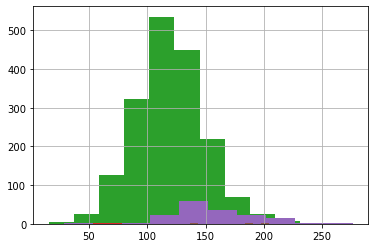

In [101]:
data_local[['sale_type', 'p_sqft']].groupby(['sale_type'])['p_sqft'].hist()

#### Grab features with highest correlation to price

In [5]:
simple_feats = list(model.data.corr()[['price']].index[0:])
simple_feats.remove('price')
simple_feats.remove('p_sqft')
simple_feats.remove('price_log')

In [6]:
simple_feats[0:20]

['id',
 'pid',
 'ms_subclass',
 'frontage',
 'lot_sqft',
 'street_material',
 'shape',
 'slope',
 'style',
 'quality',
 'condition',
 'year',
 'remod_year',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'basement_qual',
 'basement_cond',
 'basement_exposure']

In [ ]:
'price_log' in simple_feats

<AxesSubplot:>

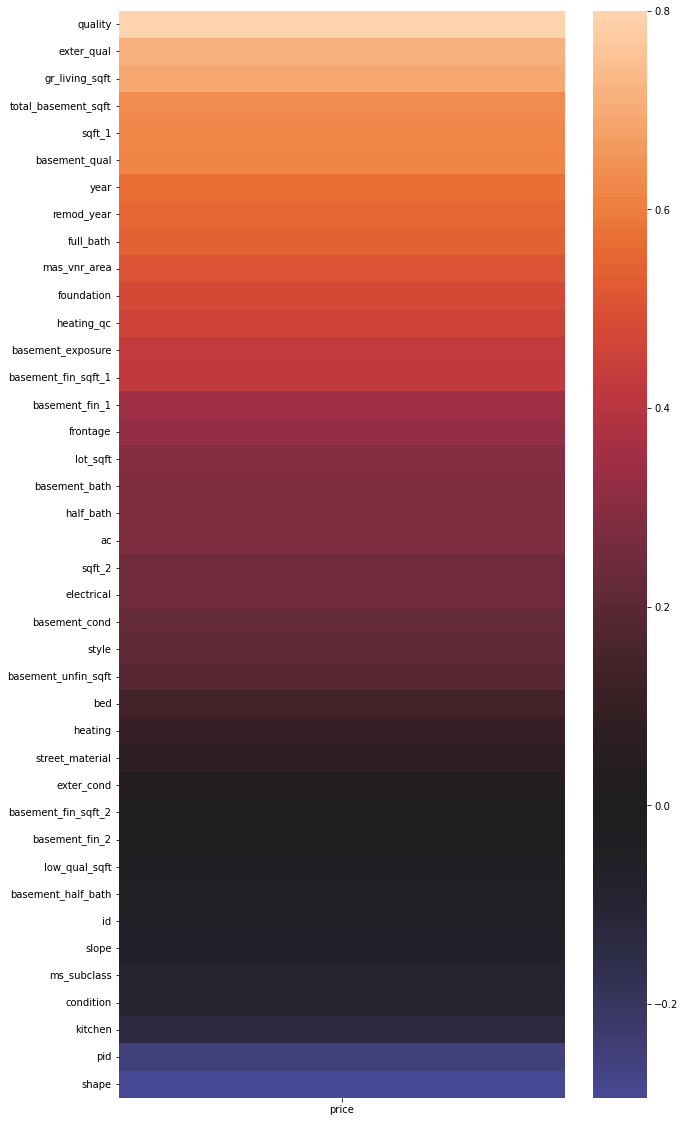

In [638]:
plt.figure(figsize=(10,20))
sns.heatmap(model.data.corr()[['price']][0:40].sort_values(by='price', ascending=False), center=0)

In [ ]:
data_local[['sale_type', 'p_sqft']].groupby(['sale_type']).hist()

In [7]:
model.data.corr().sort_values(by=['price'], ascending=False)['price'][0:20]

price                  1.000000
price_log              0.946134
quality                0.800207
exter_qual             0.712146
gr_living_sqft         0.697038
kitchen_qual           0.692336
garage_sqft            0.649897
garage_size            0.647781
p_sqft                 0.631411
total_basement_sqft    0.629303
sqft_1                 0.618486
basement_qual          0.612188
year                   0.571849
garage_finish          0.557839
garage_year            0.553780
remod_year             0.550370
baths                  0.547758
fireplace_qual         0.538925
full_bath              0.537969
rooms_total            0.504014
Name: price, dtype: float64

In [8]:
test_cats = list(model.data.corr().sort_values(by=['price'], ascending=False)['price'][0:30].index)

In [15]:
test_cats.remove('price')
test_cats.remove('price_log')
test_cats.remove('p_sqft')
test_cats.remove('n_nridght')
len(test_cats)


26

In [ ]:
test_cats[20:]

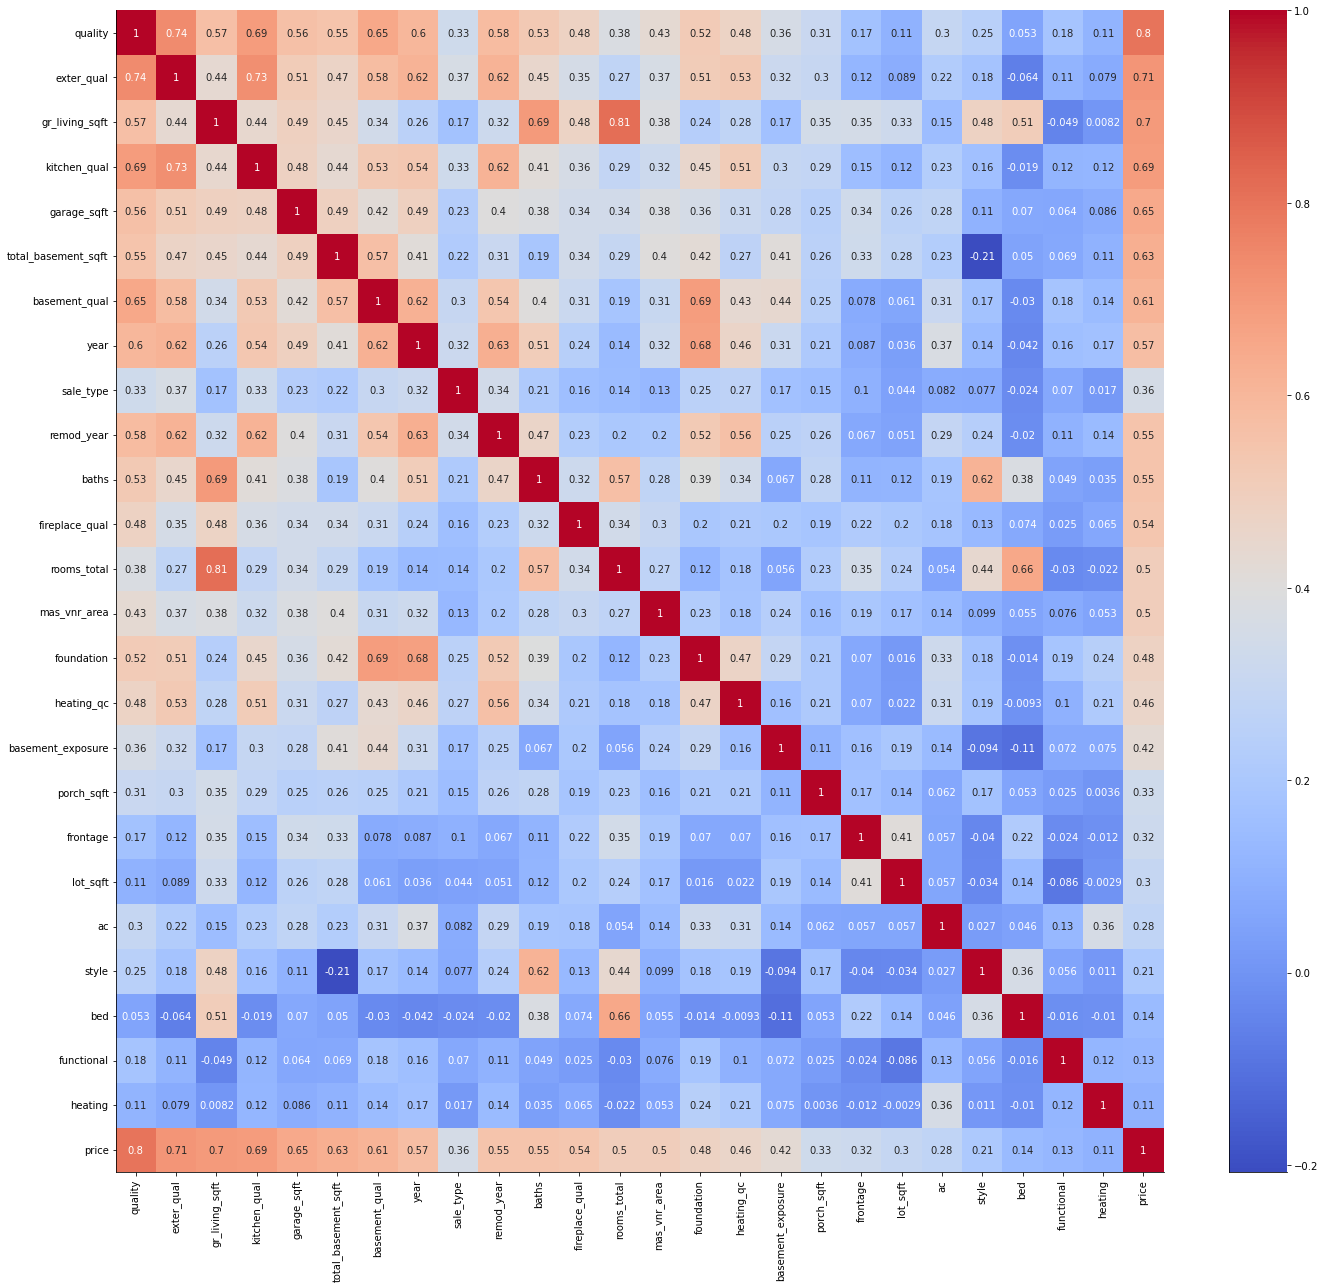

In [532]:
model.heatmap(test_cats + ['price'], figsize=(20,18))

1.5575514385863427


<AxesSubplot:>

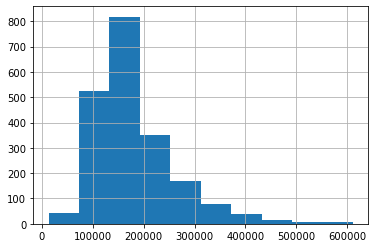

In [103]:
print(model.data['price'].skew())
model.data['price'].hist()

-0.14681576272177396


<AxesSubplot:>

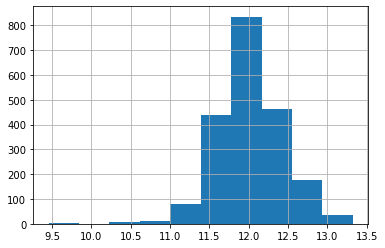

In [104]:
print(model.data['price_log'].skew())
model.data['price_log'].hist()

##### The log of final sale price is more normally distributed with a skew of only -0.14 compared to +1.56. Should see better results fitting data to the log price.
#
#

### Feature testing

In [720]:
feats_1 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 'foundation', 'heating_qc', 'exter_qual']
feats_1_n = feats_1 + model.cats_neighborhood + model.cats_type

['quality',
 'gr_living_sqft',
 'sale_type',
 'garage_sqft',
 'total_basement_sqft',
 'baths',
 'year',
 'rooms_total',
 'mas_vnr_area',
 'foundation',
 'heating_qc',
 'exter_qual']

In [738]:
feats_2 = ['quality', 'gr_living_sqft', 'bed', 'baths', 'lot_sqft']
feats_2_cats = feats_2 + model.cats_neighborhood + model.cats_type + model.cats_zoning

In [742]:
feats_3 = ['quality', 'gr_living_sqft', 'lot_sqft', 'sale_type']
feats_3_cats = feats_3 + model.cats_neighborhood + model.cats_type + model.cats_zoning + model.cats_config

In [751]:
feats_4 = ['gr_living_sqft', 'quality', 'condition', 'exter_qual', 'exter_cond', 'basement_qual', 'basement_cond', 'heating_qc', 'kitchen_qual', 'garage_qual', 'garage_cond']
feats_4_cats = feats_4 + model.cats_neighborhood + model.cats_type

In [784]:
feats_5 = ['quality', 'gr_living_sqft', 'garage_sqft', 'total_basement_sqft', 'year', 'baths', 'rooms_total', 'lot_sqft']
feats_5_cats = feats_5 + model.cats_neighborhood + model.cats_type + model.cats_config

In [881]:
feats_6 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 
'foundation', 'exter_qual', 'basement_qual', 'lot_sqft']
feats_6_cats = feats_6 + model.cats_neighborhood + model.cats_type

In [22]:
feats_7 = ['quality', 'gr_living_sqft', 'sale_type', 'garage_sqft', 'total_basement_sqft', 'baths', 'year', 'rooms_total', 'mas_vnr_area', 
'foundation', 'exter_qual', 'basement_qual', 'lot_sqft']
feats_7_cats = feats_7 + model.cats_neighborhood + model.cats_type + model.cats_zoning + model.cats_config

#### Brute force feature selection

In [24]:
def subsets(numbers):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])
    return x + [[numbers[0]] + y for y in x]
 
# wrapper function
def subsets_of_given_size(numbers, n):
    return [x for x in subsets(numbers) if len(x)==n]

# Functions borrowed from Geeks for Geeks

numbers = test_cats

ns = list(range(24, 27))

[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


##### **Function source** (https://www.geeksforgeeks.org/python-program-to-get-all-subsets-of-given-size-of-a-set/)

In [97]:
len(numbers)

26

In [17]:
# len(subsets_of_given_size(numbers, 24))

325

#### Iterate thru categorical variable batches

In [96]:
cat_combos = [
    model.cats_neighborhood + model.cats_type, 
    model.cats_neighborhood + model.cats_type + model.cats_garage, 
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_zoning,
    model.cats_neighborhood + model.cats_type + model.cats_zoning,
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_config,
    model.cats_neighborhood + model.cats_type + model.cats_garage + model.cats_zoning + model.cats_config]

#### Brute force feature selection

In [26]:
# iterate thru length n feature subsets
for n in ns:

     # generate feature combinations of length n
     feats_combos = subsets_of_given_size(numbers, n)

     # iterate thru feature combinations
     for main_feats in feats_combos:

          # iterate thru combinations of categorical batches
          for feats in cat_combos:

               # combine features with categorical variables
               feats = feats + main_feats

               # split data into training & test sets
               X = model.data[feats]
               y = model.data['price_log']
               X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

               # select hyper parameters to test
               params_r = {'alpha':[250, 500, 1000, 2000]}
               params_l = {'alpha':[0.1, 0.02, 0.015]}

               # instatiate estimators
               ridge = Ridge(random_state=14)
               lr_poly = Lasso(max_iter=10_000, random_state=14)

               # instatiate transformers
               poly = PolynomialFeatures(degree=2, include_bias=False)
               ss = StandardScaler()

               # instatiate cross validation for hyper parameter tuning
               gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)
               gs_l = GridSearchCV(lr_poly, params_l, n_jobs=-1)

               # generate polynomial feature combinations
               X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
               X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out(), index=X_test.index)

               # scale data
               X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)
               X_test_scaled = pd.DataFrame(ss.transform(X_test_poly), columns=X_test_poly.columns, index=X_test.index)

               # train models
               gs_l.fit(X_train_scaled, y_train)
               gs_r.fit(X_train_scaled, y_train)

               # predict SalePrice
               y_pred = pd.DataFrame(gs_l.predict(X_test_scaled), columns=['preds'], index=X_test.index)
               y_pred_r = pd.DataFrame(gs_r.predict(X_test_scaled), columns=['preds_r'], index=X_test.index)

               # Score and log Lasso model predictions
               lasso_train_r2 = gs_l.score(X_train_scaled, y_train)
               lasso_test_r2 = gs_l.score(X_test_scaled, y_test)
               lasso_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_l.predict(X_train_scaled)), squared=False), 0)
               lasso_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False), 0)

               print(f'Lasso Best Est: {gs_l.best_estimator_}')
               print(f'Lasso Train R2: {lasso_train_r2}')
               print(f'Lasso Test R2: {lasso_test_r2}')
               print(f'Lasso Train RMSE: {lasso_train_rmse}')
               print(f'Lasso Test RMSE: {lasso_test_rmse}')

               # Score and log Ridge model predictions
               # R2
               ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
               ridge_test_r2 = gs_r.score(X_test_scaled, y_test)
               # RMSE
               ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)
               ridge_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred_r), squared=False), 0)

               print(f'Ridge Best Est: {gs_r.best_estimator_}')
               print(f'Ridge Train R2: {ridge_train_r2}')
               print(f'Ridge Test R2: {ridge_test_r2}')
               print(f'Ridge Train RMSE: {ridge_train_rmse}')
               print(f'Ridge Test RMSE: {ridge_test_rmse}')
               
               # Log results and export to .csv for final feature selection
               # View results_new as tab separated text doc (best viewed in excel)
               results = pd.DataFrame({'lasso_train_r2': lasso_train_r2,
                    'lasso_test_r2': lasso_test_r2,
                    'lasso_train_rmse': lasso_train_rmse,
                    'lasso_test_rmse': lasso_test_rmse,
                    'lasso_alpha': gs_l.best_params_['alpha'],
                    'ridge_train_r2': ridge_train_r2,
                    'ridge_test_r2': ridge_test_r2,
                    'ridge_train_rmse': ridge_train_rmse,
                    'ridge_test_rmse': ridge_test_rmse,
                    'ridge_alpha': gs_r.best_params_['alpha'],
                    'features':[feats]}, index=[0])
               
               # Export
               results.to_csv('./datasets/feature_selection_results.txt', sep='\t', mode='a', index=False, header=False)


24
Lasso Best Est: Lasso(alpha=0.01, max_iter=10000, random_state=14)
Lasso Train R2: 0.8769149074095349
Lasso Test R2: 0.8397569433540373
Lasso Train RMSE: 24792.0
Lasso Test RMSE: 25629.0
Ridge Best Est: Ridge(alpha=1000, random_state=14)
Ridge Train R2: 0.9000070109735838
Ridge Test R2: 0.8443233011843182
Ridge Train RMSE: 21409.0
Ridge Test RMSE: 24397.0
Lasso Best Est: Lasso(alpha=0.01, max_iter=10000, random_state=14)
Lasso Train R2: 0.8791723173256334
Lasso Test R2: 0.8427195049425269
Lasso Train RMSE: 24520.0
Lasso Test RMSE: 25229.0
Ridge Best Est: Ridge(alpha=1000, random_state=14)
Ridge Train R2: 0.9038184098566764
Ridge Test R2: 0.8501018911602046
Ridge Train RMSE: 20977.0
Ridge Test RMSE: 23670.0
Lasso Best Est: Lasso(alpha=0.01, max_iter=10000, random_state=14)
Lasso Train R2: 0.879624942889797
Lasso Test R2: 0.8427184705087554
Lasso Train RMSE: 24489.0
Lasso Test RMSE: 25221.0
Ridge Best Est: Ridge(alpha=1000, random_state=14)
Ridge Train R2: 0.9076548681895792
Ridge Tes

#### Feature selection gathered from datasets folder in feature_selection_results.txt 

In [77]:
good_feats = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 'n_noridge', 'n_idotrr', 'n_crawfor', 'n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 'n_names', 'type_twn', 'type_sf', 'type_twn_end', 'gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport', 'quality', 'gr_living_sqft', 'kitchen_qual', 'garage_sqft', 'garage_size', 'total_basement_sqft', 'sqft_1', 'basement_qual', 'year', 'garage_finish', 'garage_year', 'remod_year', 'baths', 'fireplace_qual', 'full_bath', 'mas_vnr_area', 'foundation', 'fireplaces', 'heating_qc', 'basement_exposure', 'basement_fin_sqft_1', 'gar_attached', 'sale_type', 'basement_fin_1']

#### Train features on all the training data

In [92]:
X_train = model.data[good_feats]
y_train = model.data['price_log']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

params_r = {'alpha':[250, 500, 1000, 1500]}
params_l = {'alpha':[0.1, 0.02, 0.0175, 0.03]}

ridge = Ridge(random_state=14)
lr_poly = Lasso(max_iter=10_000, random_state=14)

poly = PolynomialFeatures(degree=2, include_bias=False)
ss = StandardScaler()

gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)
# gs_l = GridSearchCV(lr_poly, params_l, n_jobs=-1)

X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
# X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out(), index=X_test.index)

X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(ss.transform(X_test_poly), columns=X_test_poly.columns, index=X_test.index)

# gs_l.fit(X_train_scaled, y_train)
gs_r.fit(X_train_scaled, y_train)

# y_pred = pd.DataFrame(gs_l.predict(X_test_scaled), columns=['preds'], index=X_test.index)
y_pred_r = pd.DataFrame(gs_r.predict(X_test_scaled), columns=['preds_r'], index=X_test.index)

# Lasso
# lasso_train_r2 = gs_l.score(X_train_scaled, y_train)
# lasso_test_r2 = gs_l.score(X_test_scaled, y_test)
# lasso_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_l.predict(X_train_scaled)), squared=False), 0)
# lasso_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False), 0)

# print(f'Lasso Best Est: {gs_l.best_estimator_}')
# print(f'Lasso Train R2: {lasso_train_r2}')
# print(f'Lasso Test R2: {lasso_test_r2}')

# print(f'Lasso Train RMSE: {lasso_train_rmse}')
# print(f'Lasso Test RMSE: {lasso_test_rmse}')

# Ridge
ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
# ridge_test_r2 = gs_r.score(X_test_scaled, y_test)
ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)
# ridge_test_rmse = round(mean_squared_error(np.exp(y_test), np.exp(y_pred_r), squared=False), 0)

print(f'Ridge Best Est: {gs_r.best_estimator_}')
print(f'Ridge Train R2: {ridge_train_r2}')
# print(f'Ridge Test R2: {ridge_test_r2}')

print(f'Ridge Train RMSE: {ridge_train_rmse}')
# print(f'Ridge Test RMSE: {ridge_test_rmse}')

# results2 = pd.DataFrame({'lasso_train_r2': lasso_train_r2,
#      'lasso_test_r2': lasso_test_r2,
#      'lasso_train_rmse': lasso_train_rmse,
#      'lasso_test_rmse': lasso_test_rmse,
#      'lasso_alpha': gs_l.best_params_,
#      'ridge_train_r2': ridge_train_r2,
#      'ridge_test_r2': ridge_test_r2,
#      'ridge_train_rmse': ridge_train_rmse,
#      'ridge_test_rmse': ridge_test_rmse,
#      'ridge_alpha': gs_r.best_params_,
#      'features':[feats]}, index=[0])
# results2.to_csv('./datasets/results_new.txt', sep='\t', mode='a', index=False, header=False)

Ridge Best Est: Ridge(alpha=100, random_state=14)
Ridge Train R2: 0.9344836127144176
Ridge Train RMSE: 16301.0


In [28]:
# model = ModelData()
# model.train_test(X=good_feats, y='price_log')
# model.run_lasso(scale=True, poly=False, a=.1)

n_grnhill              0
n_greens               0
n_blueste              0
n_npkvill              0
n_veenker              0
n_brdale               0
n_blmngtn              0
n_meadowv              0
n_clearcr              0
n_swisu                0
n_stonebr              0
n_timber               0
n_noridge              0
n_idotrr               0
n_crawfor              0
n_brkside              0
n_mitchel              0
n_sawyerw              0
n_nwames               0
n_sawyer               0
n_gilbert              0
n_nridght              0
n_somerst              0
n_edwards              0
n_oldtown              0
n_collgcr              0
n_names                0
type_twn               0
type_sf                0
type_twn_end           0
gar_attached           0
gar_detached           0
gar_builtin            0
gar_basement           0
gar_2types             0
gar_carport            0
quality                0
gr_living_sqft         0
kitchen_qual           0
garage_sqft            0


In [740]:
pd.DataFrame(zip(model.lasso.feature_names_in_, model.lasso.coef_))

,0,1
0,quality,28573.495988
1,gr_living_sqft,20784.094761
2,bed,-1587.172099
3,baths,4510.985138
4,lot_sqft,2284.719033
5,n_grnhill,0.000000
6,n_greens,950.927583
7,n_blueste,-0.000000
8,n_npkvill,161.138979
9,n_veenker,-1242.461048


##### Explore Year data. An interesting trend started in the mid 1990's and early 2000's. Housing production went WAY up all across the United States. As a result, we have many more new homes of a 'high'* quality. Will explore modeling home values segmented by pre and post 1995.

##### The 'Foreclosure Crisis' is presumed to have officially begun in 2007 and was at its worst in 2010. We will also explore the change in price between 2007 & 2010

##### * Housing 'quality' metric on average is high, but the construction quality has since been suggested by many to be of a lower overall quality.

<AxesSubplot:xlabel='year', ylabel='price'>

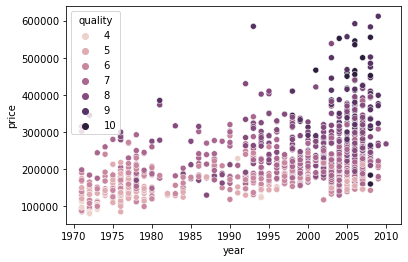

In [106]:
# Price vs Year property was built
sns.scatterplot(x=model.data['year'][model.data['year'] > 1970], y=model.data['price'][model.data['year'] > 1970], hue=model.data['quality'][model.data['year'] > 1970])

<AxesSubplot:xlabel='year', ylabel='price'>

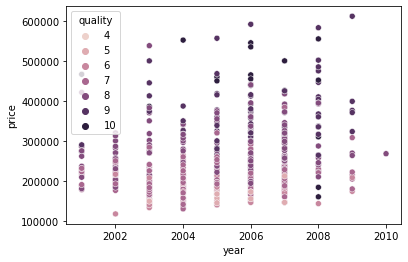

In [110]:
sns.scatterplot(x=model.data['year'][model.data['year'] > 2000], y=model.data['price'][model.data['year'] > 2000], hue=model.data['quality'][model.data['year'] > 2000])

Make new model for houses built in 2000s

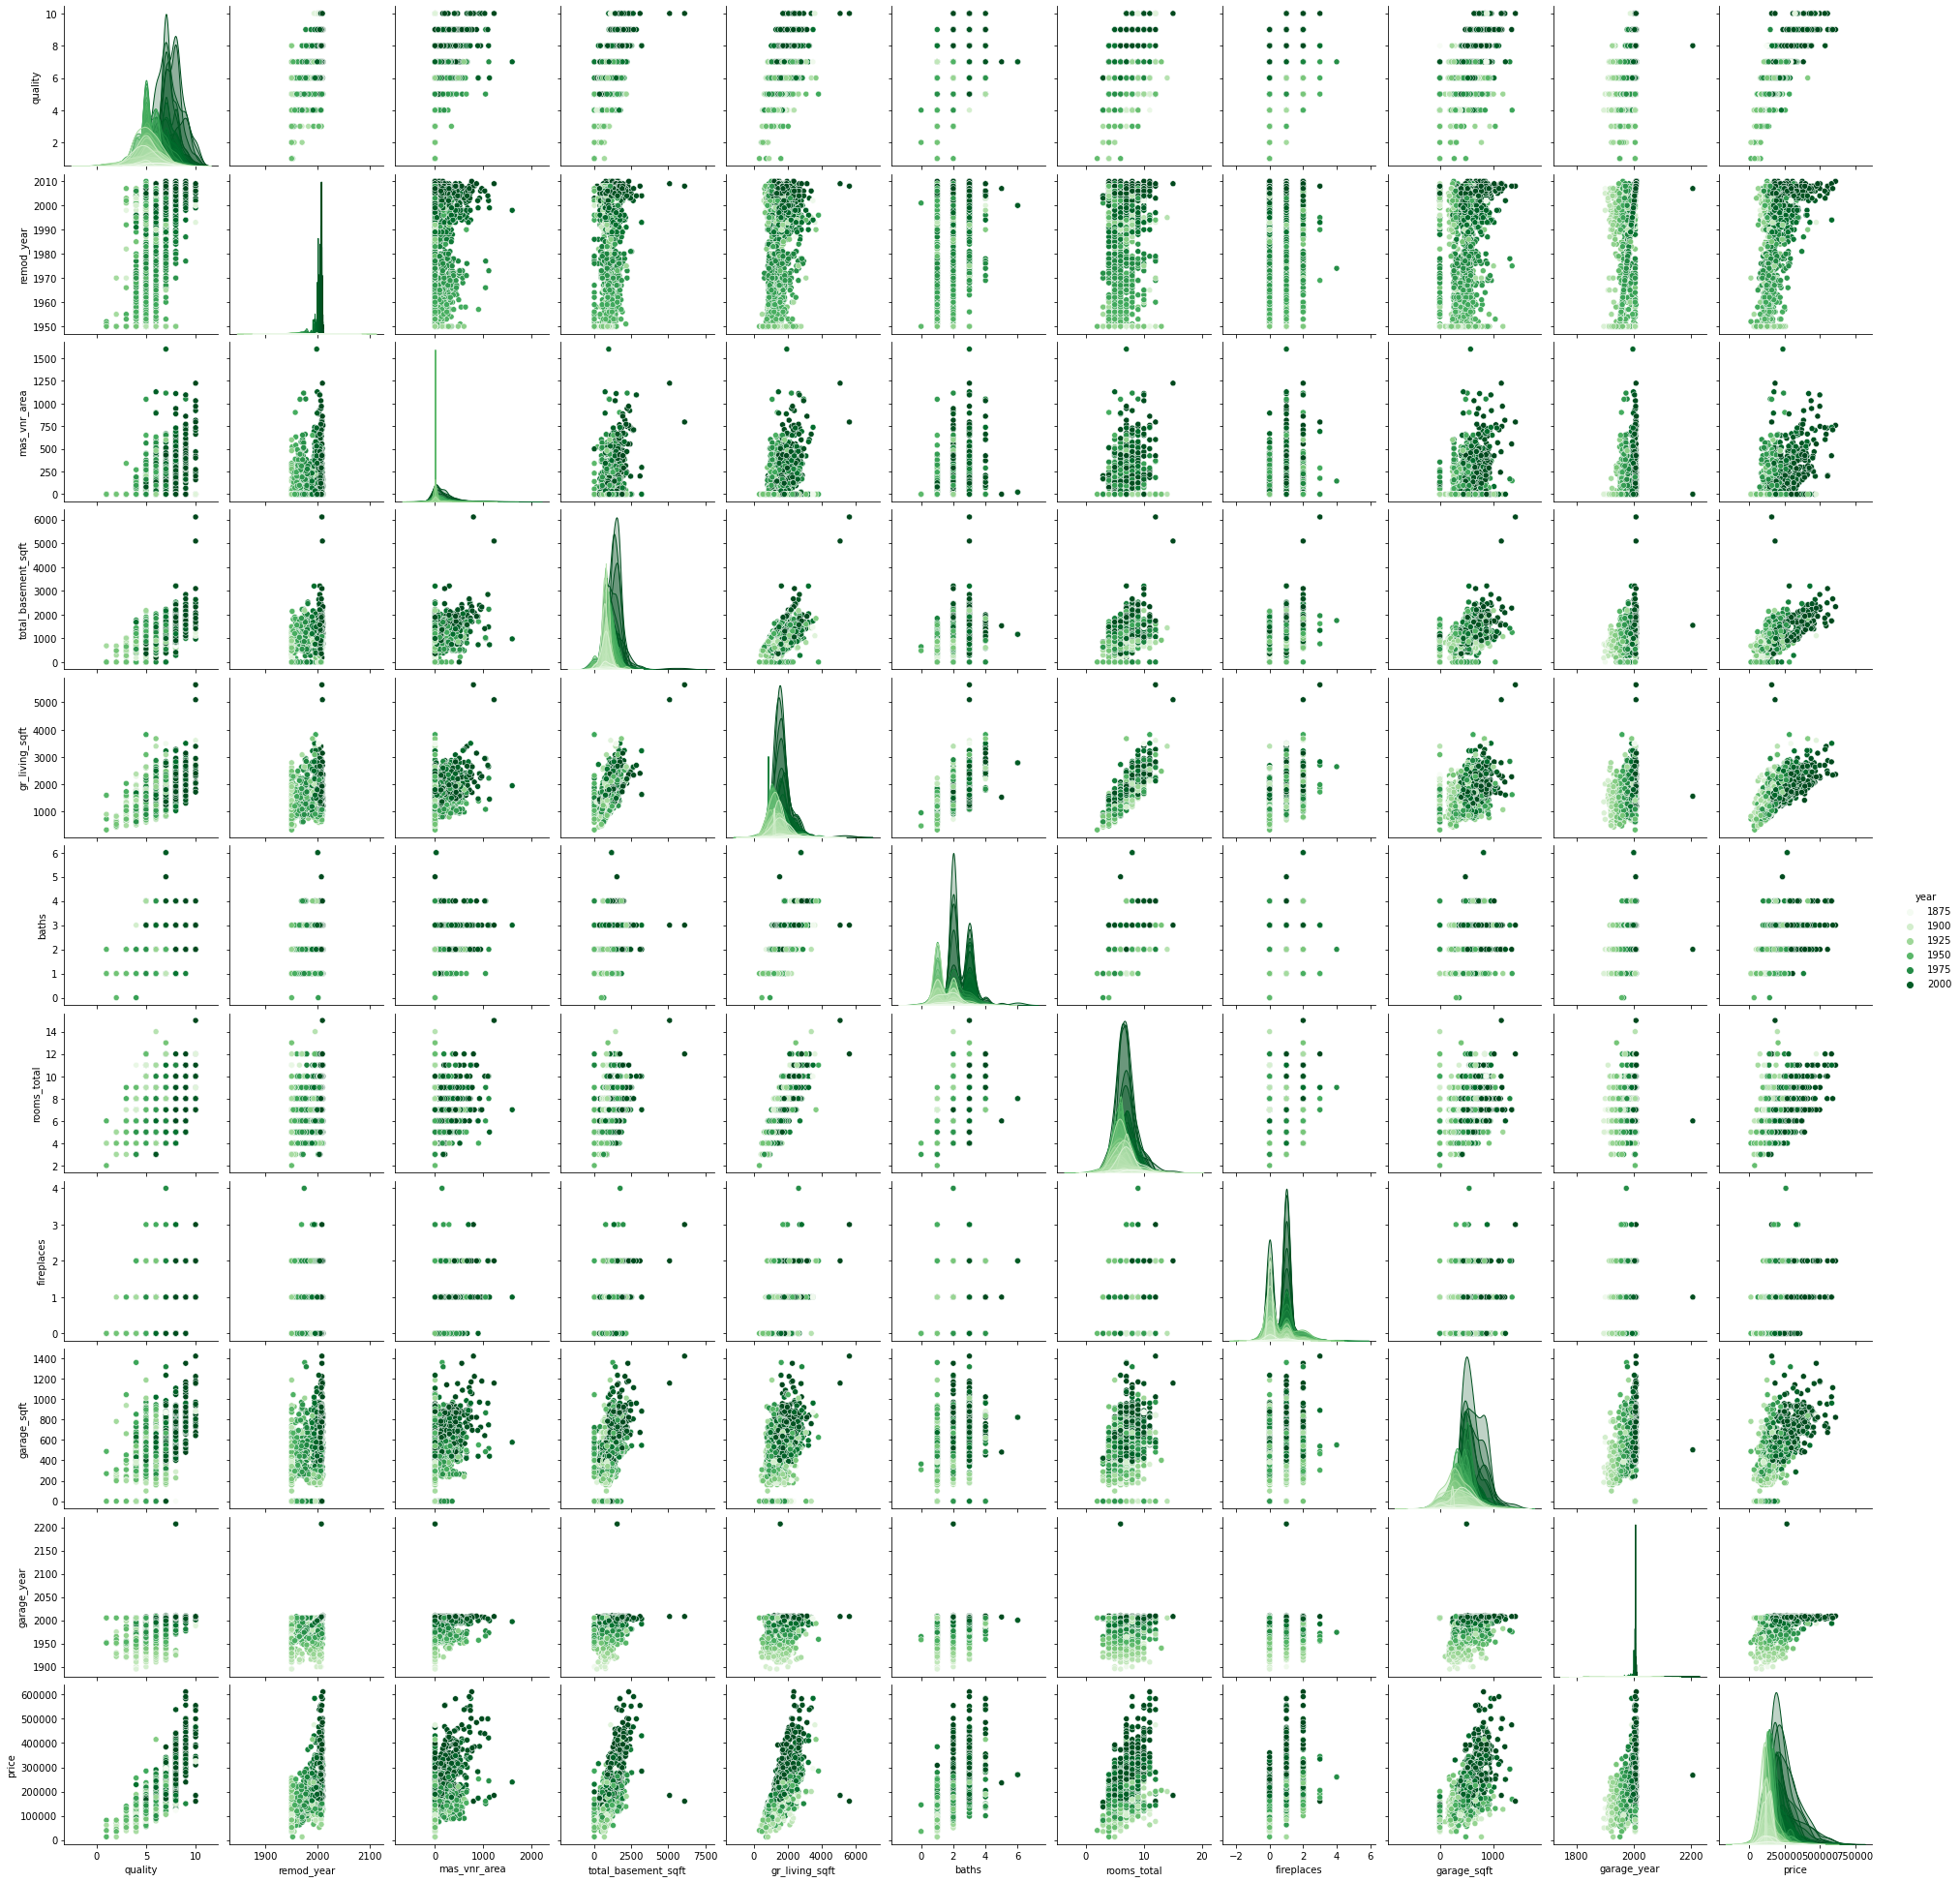

In [237]:
sns.pairplot(model.data[feats], hue='year', palette='husl');

In [ ]:
model.data['year'][model.data['year'] > 1990], y=model.data['price'][model.data['year'] > 1970], hue=model.data['quality'][model.data['year'] > 1970])

### Submit scores

In [93]:
def predict_testing(predictors, estimator):

    # select predictive columns
    X = model.testing_data[predictors].copy()
    # hold testing id numbers
    X_id = model.testing_data['id'].copy()
    X_id.rename({'id': 'Id'}, axis=1, inplace=True)

    # generate polynomial features (uses the transformers from the model training process above)
    X = pd.DataFrame(poly.transform(X), columns=poly.get_feature_names_out(), index=X.index)
    # scale data (uses the transformers from the model training process above)
    X = pd.DataFrame(ss.transform(X), columns=X.columns, index=X.index)

    # generate predictions
    y_preds = pd.DataFrame(np.exp(estimator.predict(X)), columns=['SalePrice'], index=X.index)
    # merge predictions with id numbers
    y_preds = pd.concat([X_id, y_preds], axis=1)
    
    # export to .csv for submission
    y_preds.to_csv('./submissions/ridge_submit.csv', index=False)



In [94]:
predict_testing(good_feats, gs_r)

       id      SalePrice
0    2658  119114.340090
1    2718  154842.610865
2    2414  197823.951401
3    1989  105059.079822
4     625  172051.235616
..    ...            ...
873  1662  188895.987369
874  1234  209483.676196
875  1373  143007.014388
876  1672  120612.756889
877  1939  126545.804169

[878 rows x 2 columns]
